# Time series Forcasting 

# Daily Temperature Dataset

In [1]:
pip install pmdarima --user

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [2]:
df=pd.read_csv("D:/Data Science/Symbiosis/Time Series/Dailytemps.csv",parse_dates=["DATE"],index_col='DATE')
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


# 1) Data Preprocessing and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [48]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

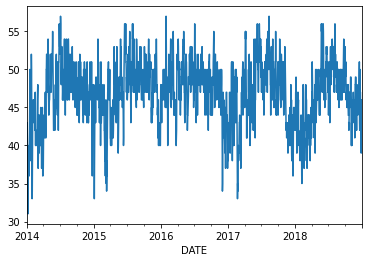

In [4]:
df["AvgTemp"].plot()

# 2) To check the data is stationary or not

In [5]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df["AvgTemp"].dropna())
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

 it is stationary


In [6]:
auto_model=auto_arima(df["AvgTemp"].dropna(),Trace=True)

In [8]:
#p=1,d=0,q=5

In [9]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.346
Date:                Fri, 09 Apr 2021   AIC                           8294.691
Time:                        11:59:27   BIC                           8338.748
Sample:                             0   HQIC                          8310.945
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2047      0.364      3.313      0.001       0.492       1.917
ar.L1          0.9741      0.008    124.283      0.000       0.959       0.989
ma.L1         -0.1281      0.024     -5.381      0.000      -0.175      -0.081
ma.L2         -0.2190      0.024     -9.031      0.000      -0.267      -0.171
ma.L3         -0.2046      0.024     -8.516      0.000      -0.252      -0.158
ma.L4         -0.1356      0.023     -5.916      0.000      -0.181      -0.091
ma.L5         -0.0512      0.025     -2.089      0.037      -0.099      -0.003
sigma2         5.5312      0.174     31.762      0.000       5.190       5.872
===================================================================================
Ljung-Box (Q):                       34.82   Jarque-Bera (JB):                20.27
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
#train,test

In [12]:
cc

In [13]:
X.head()

DATE
2014-01-01    40.0
2014-01-02    43.0
2014-01-03    41.0
2014-01-04    37.0
2014-01-05    31.0
Name: AvgTemp, dtype: float64

In [14]:
X.shape

(1821,)

In [15]:
data_len=int(0.7*(len(X)))
data_len

1274

In [16]:
train=X[:data_len]
train.shape

(1274,)

In [17]:
test=X[data_len:]
test.shape

(547,)

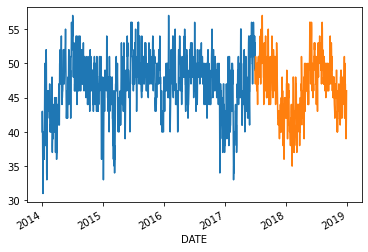

In [18]:
train.plot()
test.plot()

In [19]:
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1274
Model:                     ARMA(1, 5)   Log Likelihood               -2925.613
Method:                       css-mle   S.D. of innovations              2.403
Date:                Fri, 09 Apr 2021   AIC                           5867.226
Time:                        11:59:39   BIC                           5908.425
Sample:                             0   HQIC                          5882.700
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.8145      0.880     53.186      0.000      45.089      48.540
ar.L1.AvgTemp     0.9847      0.010    101.109      0.000       0.966       1.004
ma.L1.AvgTemp    -0.1195      0.030     -3.981      0.000      -0.178      -0.061
ma.L2.AvgTemp    -0.2444      0.030     -8.222      0.000      -0.303      -0.186
ma.L3.AvgTemp    -0.2093      0.031     -6.646      0.000      -0.271      -0.148
ma.L4.AvgTemp    -0.1543      0.029     -5.294      0.000      -0.211      -0.097
ma.L5.AvgTemp    -0.0642      0.030     -2.146      0.032      -0.123      -0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0156           +0.0000j            1.0156            0.0000
MA.1            1.0869           -0.0000j            1.0869           -0.0000
MA.2            0.0795           -1.8236j            1.8253           -0.2431
MA.3            0.0795           +1.8236j            1.8253            0.2431
MA.4           -1.8245           -0.9864j            2.0740           -0.4211
MA.5           -1.8245           +0.9864j            2.0740            0.4211
-----------------------------------------------------------------------------
"""

In [22]:
ypred_train=model_fit.predict()

In [23]:
ypred_train

DATE
2014-01-01    46.814460
2014-01-02    41.249204
2014-01-03    44.081098
2014-01-04    41.765683
2014-01-05    38.299522
                ...    
2017-06-26    50.417289
2017-06-27    50.834083
2017-06-28    53.379283
2017-06-29    48.717818
2017-06-30    51.998485
Length: 1274, dtype: float64

In [24]:
ypred_test=model_fit.predict(start=len(train),end=(len(X)-1))

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAR",mean_absolute_error(test,ypred_test))
print("MSE",mean_squared_error(test,ypred_test))
print("RMSE",np.sqrt(mean_squared_error(test,ypred_test)))

MAR 3.1982536009271723
MSE 16.200476129808383
RMSE 4.02498150676601


In [26]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    

In [27]:
ypred_test

1274    52.373911
1275    51.829282
1276    51.317595
1277    50.883342
1278    50.756652
          ...    
1816    46.815426
1817    46.815411
1818    46.815396
1819    46.815382
1820    46.815368
Length: 547, dtype: float64

In [33]:
ypred_test.shape

(547,)

In [28]:
test

DATE
2017-07-01    49.0
2017-07-02    47.0
2017-07-03    51.0
2017-07-04    48.0
2017-07-05    48.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 547, dtype: float64

In [29]:
"2017-07-01","2018-12-30"

('2017-07-01', '2018-12-30')

In [35]:
test_dates=pd.date_range(start="2017-07-01",end="2018-12-29")#0.7

In [36]:
test_dates

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=547, freq='D')

In [37]:
test_dates.shape

(547,)

In [38]:
ypred_test.index=test_dates
ypred_test

2017-07-01    52.373911
2017-07-02    51.829282
2017-07-03    51.317595
2017-07-04    50.883342
2017-07-05    50.756652
                ...    
2018-12-25    46.815426
2018-12-26    46.815411
2018-12-27    46.815396
2018-12-28    46.815382
2018-12-29    46.815368
Freq: D, Length: 547, dtype: float64

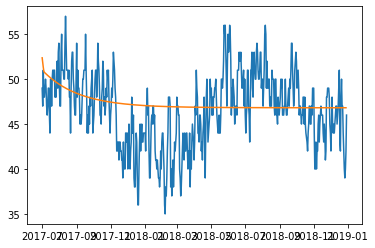

In [40]:
plt.plot(test)
plt.plot(ypred_test)

In [41]:
new_dates_range=pd.date_range(start="2018-12-30",end="2019-01-28")
new_dates_range

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28'],
              dtype='datetime64[ns]', freq='D')

In [42]:
model=ARIMA(X,order=(1,0,5))
model_fit=model.fit()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [43]:
new_pred=model_fit.predict(start=len(X),end=len(X)+29)

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [45]:
len(new_pred),len(new_dates_range)

(30, 30)

In [46]:
new_pred.index=new_dates_range

In [47]:
new_pred

2018-12-30    46.418065
2018-12-31    46.113784
2019-01-01    45.617773
2019-01-02    45.249558
2019-01-03    45.116987
2019-01-04    45.136774
2019-01-05    45.156283
2019-01-06    45.175520
2019-01-07    45.194486
2019-01-08    45.213187
2019-01-09    45.231626
2019-01-10    45.249807
2019-01-11    45.267733
2019-01-12    45.285408
2019-01-13    45.302835
2019-01-14    45.320018
2019-01-15    45.336961
2019-01-16    45.353666
2019-01-17    45.370137
2019-01-18    45.386377
2019-01-19    45.402390
2019-01-20    45.418178
2019-01-21    45.433745
2019-01-22    45.449095
2019-01-23    45.464229
2019-01-24    45.479151
2019-01-25    45.493864
2019-01-26    45.508371
2019-01-27    45.522674
2019-01-28    45.536778
Freq: D, dtype: float64